<a href="https://colab.research.google.com/github/lindsayrain/aia_handy_machine_learning/blob/main/2_%E5%85%A9%E5%80%8B%E7%B0%A1%E5%96%AE%E7%9A%84_AI_%E8%A8%93%E7%B7%B4%E7%AF%84%E4%BE%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

原始檔案位置：

https://colab.research.google.com/drive/1rGoLYTkI2d4TTcCBCY5g9ayGRB_DEj8I

# 預先設置
1. 建立副本至個人目錄，否則不能存檔<br>
<img src="https://imgur.com/s9ZxqDo.png" alt="Make Copy" width="300"><br>
2. (必須做)設定執行階段類型<br>
<img src="https://imgur.com/Ejl9Aju.png" alt="change instance 1" width="400"><br>
<img src="https://imgur.com/DwuPwbd.png" alt="change instance 2" width="400"><br>
  * ```None``` 上份記事本
  * ```GPU``` <font color="red">這份記事本</font>
  * ```TPU``` 特殊需求
3. 以了解大綱為主，若看不懂的東西，看註解或者用變數名稱去猜。
```python
# 井字號後的是註解
```

# 期望目標
這份程式碼的目的是讓各位摸一次```tensorflow```中最簡單的AI訓練流程。<br>
各位可以只使用```shift+enter```就可以執行程式碼。<br>
你不需要理解每一行的細節，只要知道每個程式碼段落想做什麼即可。<br>

有很多稍微進階東西不在這份程式碼中，可以去tensorflow官網、pytorch官網看他們的教學文件。<br>

* tensorflow : https://www.tensorflow.org/tutorials
* pytorch : https://pytorch.org/tutorials/

In [ ]:
#@title 導入套件

# 數值計算
import numpy as np
import tensorflow as tf
# 畫圖用
import plotly.express as px
# 畫圖用比較底層的套件
import matplotlib.pyplot as plt
# 雜項
import pandas as pd
import inspect

# 兩個簡單的 AI 訓練範例
在這份檔案中，我們將帶各位看一下在機器學習中最簡單的幾個任務
1. 方程式模型回歸 (用輸入預測輸出，例：用父母身高預測小孩身高)
2. 卷積神經網路影像分類（影像是貓、狗？）


# 範例1 : 方程式模型回歸

## 目標函式

In [ ]:
def func(x, y):
  return (
      5*x 
      + 3*y 
      + 0.1*x**2 
      + 0.2*x*y 
      + 5*y**2 
      + 5*np.sin(10*x*y)
    )

In [ ]:
#@title 創建回歸所需資料集
x_min = -1 #@param {type:"number"}
x_max = 1 #@param {type:"number"}
y_min = -1 #@param {type:"number"}
y_max = 1 #@param {type:"number"}
nodes = 100 #@param {type:"number"}

x = np.random.uniform(x_min, x_max, size=(nodes))
y = np.random.uniform(x_min, x_max, size=(nodes))
z = func(x,y)

In [ ]:
#@title 視覺化資料集
px.scatter_3d(
    x=x,
    y=y,
    z=z
)

## 線性模型

In [ ]:
# 模型輸入:features, 輸出:target
features = np.stack([x,y],axis=1)
target = z.reshape(-1,1)

In [ ]:
features.shape, target.shape

((1000, 2), (1000, 1))

In [ ]:
# 定義模型
# pred <= matmul(w, x) + b
# 其中 w 跟 b 為在linear_model中的參數, x 為輸入
# 此次範例為 w1*x + w2*y + b
linear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [ ]:
# 損失函式為均方差 (y-y_pred)**2
linear_model.compile(
    loss="mse"
)

In [ ]:
# 要找到最好的 linear_model 中的參數 使得損失函數最低
history = linear_model.fit(
    x=features, # 模型的輸入
    y=target,   # 要被預測的目標
    batch_size=50, # 一次抽多少筆資料訓練
    epochs=1000,   # 總共要抽光訓練資料多少次
    validation_split=0.2, # 挑 20% 的資料不訓練（驗證使用） (例：考試考券不該先被看過，不然的話背答案就好了)
)

Epoch 1/1000
16/16 [==============================] - 1s 14ms/step - loss: 26.7697 - val_loss: 30.3377
Epoch 2/1000
16/16 [==============================] - 0s 4ms/step - loss: 26.6280 - val_loss: 30.1885
Epoch 3/1000
16/16 [==============================] - 0s 5ms/step - loss: 26.5088 - val_loss: 30.0416
Epoch 4/1000
16/16 [==============================] - 0s 4ms/step - loss: 26.3885 - val_loss: 29.8958
Epoch 5/1000
16/16 [==============================] - 0s 4ms/step - loss: 26.2725 - val_loss: 29.7526
Epoch 6/1000
16/16 [==============================] - 0s 4ms/step - loss: 26.1576 - val_loss: 29.6134
Epoch 7/1000
16/16 [==============================] - 0s 4ms/step - loss: 26.0450 - val_loss: 29.4715
Epoch 8/1000
16/16 [==============================] - 0s 4ms/step - loss: 25.9299 - val_loss: 29.3291
Epoch 9/1000
16/16 [==============================] - 0s 4ms/step - loss: 25.8158 - val_loss: 29.1884
Epoch 10/1000
16/16 [==============================] - 0s 7ms/step - loss: 25.701

In [ ]:
print("\tvariables in linear_model")
for v in linear_model.variables:
  print(v.name, v.numpy().shape)
  print(v.numpy())

print("="*60)
print("\toriginal function")
print(inspect.getsource(func))

	variables in linear_model
dense/kernel:0 (2, 1)
[[5.1376824]
 [2.9511719]]
dense/bias:0 (1,)
[1.8120999]
	original function
def func(x, y):
  return (
      5*x 
      + 3*y 
      + 0.1*x**2 
      + 0.2*x*y 
      + 5*y**2 
      + 5*np.sin(10*x*y)
    )



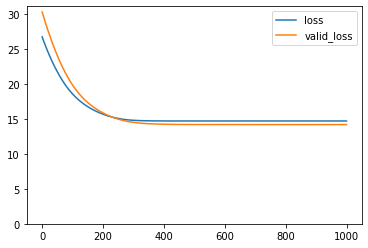

In [ ]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="valid_loss")
plt.gca().set_ylim(bottom=0)
plt.legend()
plt.show()

In [ ]:
pred = linear_model(features).numpy().reshape(-1)

In [ ]:
#@title define scatter 3d function
def scatter_3d(x, y, target, pred):
  df = pd.concat([
      pd.DataFrame.from_dict(
      {
        "x":x,
        "y":y,
        "z":target,
        "target":"train",
      }),
      pd.DataFrame.from_dict(
      {
        "x":x,
        "y":y,
        "z":pred,
        "target":"pred",
      })
      ],
      ignore_index=True
  )

  fig = px.scatter_3d(
    df,
    x="x",
    y="y",
    z="z",
    color="target",
  )

  return fig

In [ ]:
scatter_3d(x,y,z,pred)

## Early Stop
（做到差不多就好了）後期損失函數根本沒什麼在降，要在何時停止計算呢<br>
一個作法是偷看預測成績，如果發現沒什麼長進就停止訓練。

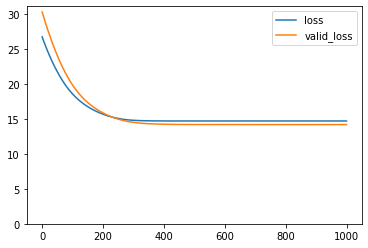

In [ ]:
# 之前的損失函數圖
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="valid_loss")
plt.gca().set_ylim(bottom=0)
plt.legend()
plt.show()

Epoch 1/1000
27/27 [==============================] - 1s 9ms/step - loss: 33.6180 - val_loss: 38.5597
Epoch 2/1000
27/27 [==============================] - 0s 5ms/step - loss: 33.3582 - val_loss: 38.2605
Epoch 3/1000
27/27 [==============================] - 0s 4ms/step - loss: 33.1276 - val_loss: 37.9919
Epoch 4/1000
27/27 [==============================] - 0s 5ms/step - loss: 32.8985 - val_loss: 37.7066
Epoch 5/1000
27/27 [==============================] - 0s 5ms/step - loss: 32.6595 - val_loss: 37.4076
Epoch 6/1000
27/27 [==============================] - 0s 6ms/step - loss: 32.4292 - val_loss: 37.1416
Epoch 7/1000
27/27 [==============================] - 0s 5ms/step - loss: 32.2076 - val_loss: 36.8694
Epoch 8/1000
27/27 [==============================] - 0s 4ms/step - loss: 31.9832 - val_loss: 36.5924
Epoch 9/1000
27/27 [==============================] - 0s 5ms/step - loss: 31.7622 - val_loss: 36.3259
Epoch 10/1000
27/27 [==============================] - 0s 4ms/step - loss: 31.5469

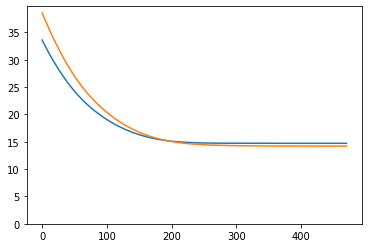

In [ ]:
# 請看下方註解處

linear_model_early_stop = tf.keras.models.clone_model(linear_model)
linear_model_early_stop.compile(
    loss="mse",
)
history_early_stop = linear_model_early_stop.fit(
    x=features,
    y=target,
    batch_size=30,
    epochs=1000,
    validation_split=0.2,
    callbacks=[
    tf.keras.callbacks.EarlyStopping(
      monitor="val_loss", # 參考指標為 val_loss
      patience=20,        # 如果 20 次都沒有進步，那麼就停止訓練
      verbose=2,          # Early Stop時要印出訊息
    ),
]
)

plt.plot(history_early_stop.history["loss"])
plt.plot(history_early_stop.history["val_loss"])
plt.ylim(bottom=0)
plt.show()

## 如果是傳統的機器學習
要自行尋找特徵，如x\*\*2, x*y, y*\*\*2, sin(x*y) ...

Epoch 1/1000
27/27 [==============================] - 1s 8ms/step - loss: 30.9604 - val_loss: 36.1197
Epoch 2/1000
27/27 [==============================] - 0s 4ms/step - loss: 30.6361 - val_loss: 35.7207
Epoch 3/1000
27/27 [==============================] - 0s 5ms/step - loss: 30.3547 - val_loss: 35.3429
Epoch 4/1000
27/27 [==============================] - 0s 6ms/step - loss: 30.0586 - val_loss: 34.9450
Epoch 5/1000
27/27 [==============================] - 0s 4ms/step - loss: 29.7747 - val_loss: 34.5709
Epoch 6/1000
27/27 [==============================] - 0s 5ms/step - loss: 29.5089 - val_loss: 34.2389
Epoch 7/1000
27/27 [==============================] - 0s 5ms/step - loss: 29.2507 - val_loss: 33.8933
Epoch 8/1000
27/27 [==============================] - 0s 5ms/step - loss: 28.9921 - val_loss: 33.5479
Epoch 9/1000
27/27 [==============================] - 0s 5ms/step - loss: 28.7297 - val_loss: 33.1918
Epoch 10/1000
27/27 [==============================] - 0s 6ms/step - loss: 28.4750

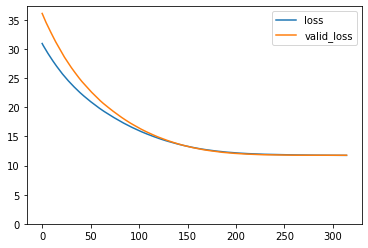

In [ ]:
# 人工設定的特徵，可以試著增加、刪減、修改特徵
additional_features = np.stack(
    [x, y, x**2, x*y, y**2, np.sin(x*y)],
     axis=1,
)

linear_model_with_new_features = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
linear_model_with_new_features.compile(
    loss="mse"
)
nf_history = linear_model_with_new_features.fit(
    x=additional_features,
    y=target,
    batch_size=30,
    epochs=1000,
    validation_split=0.2,
    callbacks=tf.keras.callbacks.EarlyStopping(
      monitor="val_loss",
      patience=20,
      verbose=2,
    ),
)
plt.plot(nf_history.history["loss"], label="loss")
plt.plot(nf_history.history["val_loss"], label="valid_loss")
plt.legend()
plt.ylim(bottom=0)
plt.show()

In [ ]:
pred_with_new_feature = linear_model_with_new_features(
    additional_features
)
scatter_3d(x,y,z,pred_with_new_feature.numpy().reshape(-1))

In [ ]:
print("\tvariables in linear_model_with_new_features")
for v in linear_model_with_new_features.variables:
  print(v.name, v.numpy().shape)
  print(v.numpy())

print("="*60)
print("\toriginal function")
print(inspect.getsource(func))

	variables in linear_model_with_new_features
dense_1/kernel:0 (6, 1)
[[5.1066    ]
 [2.9840431 ]
 [0.20683151]
 [0.6526144 ]
 [4.6292667 ]
 [0.8740562 ]]
dense_1/bias:0 (1,)
[0.16403656]
	original function
def func(x, y):
  return (
      5*x 
      + 3*y 
      + 0.1*x**2 
      + 0.2*x*y 
      + 5*y**2 
      + 5*np.sin(10*x*y)
    )



## 深度學習模型
![](https://qph.fs.quoracdn.net/main-qimg-cd401369730098aa1fdbbacfc81456b2)<br>
https://qr.ae/pGDnJR<br>
傳統的機器學習可能會嘗試人為創造一些特徵($x,y,x^2, xy, y^2, ...$)<br>
而訓練得好的深度學習模型架構有機會只使用原始資料$(x,y)$萃取出符合任務的特徵，並完成任務。

Epoch 1/1000
27/27 [==============================] - 1s 11ms/step - loss: 27.2389 - val_loss: 28.9246
Epoch 2/1000
27/27 [==============================] - 0s 6ms/step - loss: 24.1730 - val_loss: 24.9095
Epoch 3/1000
27/27 [==============================] - 0s 7ms/step - loss: 20.6713 - val_loss: 20.0882
Epoch 4/1000
27/27 [==============================] - 0s 6ms/step - loss: 17.1880 - val_loss: 15.9563
Epoch 5/1000
27/27 [==============================] - 0s 6ms/step - loss: 14.8513 - val_loss: 13.8085
Epoch 6/1000
27/27 [==============================] - 0s 6ms/step - loss: 13.6919 - val_loss: 12.8055
Epoch 7/1000
27/27 [==============================] - 0s 6ms/step - loss: 13.0776 - val_loss: 12.3358
Epoch 8/1000
27/27 [==============================] - 0s 6ms/step - loss: 12.7943 - val_loss: 11.9980
Epoch 9/1000
27/27 [==============================] - 0s 6ms/step - loss: 12.5897 - val_loss: 11.9021
Epoch 10/1000
27/27 [==============================] - 0s 6ms/step - loss: 12.399

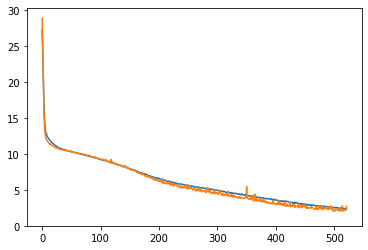

In [ ]:
# 原本的線性模型
# y_pred = matmul(w, x) + b
# linear_model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1)
# ])
# 
# 要找到最好的 w, b
# -----------------------------
# 深度學習模型
#
# h1 = relu(matmul(w1, x) + b1)
# h2 = relu(matmul(w2, h1) + b2)
# ...
# h_{n-1} = relu(matmul(w_{n-1}, h_{n-2}) + b_{n-1})
# pred = matmul(w_{n}, h_{n-1}) + b{n}
#
# 要找到最好的 w1, b1, ..., w_n, b_n
#
# 其中 relu 函式:
# relu(x) <- x if x > 0 
#            0 if x <= 0

# 從線性模型變成深度模型
deep_model = tf.keras.Sequential([
    tf.keras.layers.Dense(20,activation="relu"), 
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(1)
])

deep_model.compile(
    loss="mse",
)
deep_history = deep_model.fit(
    x=features,
    y=target,
    batch_size=30,
    epochs=1000,
    validation_split=0.2,
    callbacks=[
      tf.keras.callbacks.EarlyStopping(
          monitor="val_loss",
          patience=20,
          verbose=2
          ),
    ]
)

plt.plot(deep_history.history["loss"])
plt.plot(deep_history.history["val_loss"])
plt.ylim(bottom=0)
plt.show()

In [ ]:
pred_deep = deep_model(features).numpy().reshape(-1)
scatter_3d(x,y,z,pred_deep)

## 小練習
1. 變更 **目標函式**
2. 變更 **如果是傳統的機器學習** 內的特徵
3. 變更 **深度學習模型** 的層數、參數量

# 範例2 : 使用CNN進行影像分類
參考連結：https://www.tensorflow.org/tutorials/keras/classification

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
import tensorflow_datasets as tfds
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [ ]:
#@title 讀取資料集
dataset_name = "fashion_mnist" #@param ["cifar10", "cifar100", "fashion_mnist", "mnist"]
total_classes = {
    "cifar10" : 10,
    "cifar100": 100,
    "fashion_mnist":10,
    "mnist": 10,
}[dataset_name]

label_map = {
    "cifar10" : ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"],
    "mnist"   : [0,1,2,3,4,5,6,7,8,9,10],
    "fashion_mnist" : ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    "cifar100":[*map(lambda idx:f"label:{idx}",range(100))]
}[dataset_name]

dataset = getattr(tf.keras.datasets, dataset_name)

(train_images, train_labels), (test_images, test_labels) = dataset.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

if train_images.ndim==3:
  train_images = np.stack([train_images]*3,axis=-1)
  test_images = np.stack([test_images]*3,axis=-1)

if train_labels.ndim==1:
  train_labels = train_labels.reshape(-1,1)
  test_labels = test_labels.reshape(-1,1)

4431872/4422102 [==============================] - 0s 0us/step


## 觀察資料

### 資料筆數

In [ ]:
train_images.shape

(60000, 28, 28, 3)

In [ ]:
test_images.shape

(10000, 28, 28, 3)

### 圖片樣貌

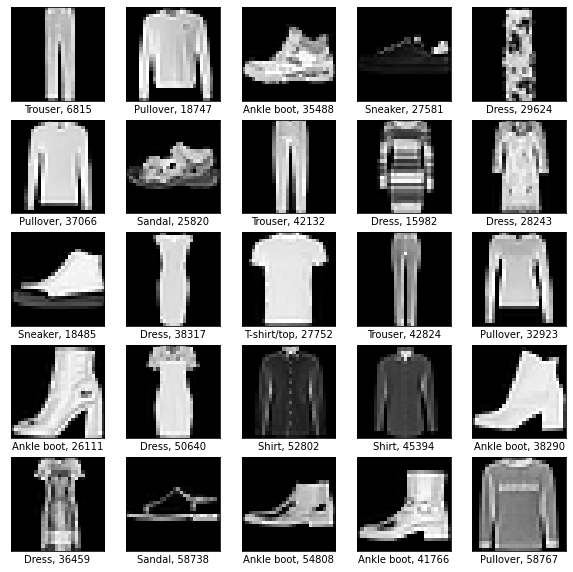

In [ ]:
plt.figure(figsize=(10,10))
for idx, ith_image in enumerate(np.random.randint(0,len(train_images),size=25)):
  plt.subplot(5,5,idx+1)
  plt.imshow(train_images[ith_image])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(str(label_map[train_labels[ith_image][0]])+", "+str(ith_image))

## 卷積
<img src="https://i.stack.imgur.com/FjvuN.gif" width="512"><br>
ref : https://stackoverflow.com/questions/42883547/intuitive-understanding-of-1d-2d-and-3d-convolutions-in-convolutional-neural-n
```python
tf.keras.layers.Conv2D(
  filters=2,
  kernel_size=4,
  padding="same",
)
```

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu"),
    tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)),

    tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu"),
    tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)),

    tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation="relu"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(total_classes),
])

In [ ]:
# 嵌入分類模型使用的 loss function，以及想要關注的額外數值(accuracy)
conv_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [ ]:
conv_history = conv_model.fit(
    x=train_images,
    y=train_labels,
    batch_size=1024,
    validation_data=(test_images, test_labels),
    epochs=100,
    callbacks=[
      tf.keras.callbacks.EarlyStopping(
          monitor="val_loss",
          patience=5,
          verbose=2
      ),
    ]
)

Epoch 1/100
59/59 [==============================] - 7s 80ms/step - loss: 1.0216 - accuracy: 0.6345 - val_loss: 0.6822 - val_accuracy: 0.7382
Epoch 2/100
59/59 [==============================] - 4s 61ms/step - loss: 0.6118 - accuracy: 0.7688 - val_loss: 0.5580 - val_accuracy: 0.7727
Epoch 3/100
59/59 [==============================] - 4s 61ms/step - loss: 0.5113 - accuracy: 0.8075 - val_loss: 0.4935 - val_accuracy: 0.8207
Epoch 4/100
59/59 [==============================] - 4s 61ms/step - loss: 0.4552 - accuracy: 0.8315 - val_loss: 0.4488 - val_accuracy: 0.8357
Epoch 5/100
59/59 [==============================] - 4s 61ms/step - loss: 0.4115 - accuracy: 0.8504 - val_loss: 0.4146 - val_accuracy: 0.8474
Epoch 6/100
59/59 [==============================] - 4s 61ms/step - loss: 0.3825 - accuracy: 0.8600 - val_loss: 0.3813 - val_accuracy: 0.8624
Epoch 7/100
59/59 [==============================] - 4s 61ms/step - loss: 0.3599 - accuracy: 0.8678 - val_loss: 0.4070 - val_accuracy: 0.8479
Epoch 

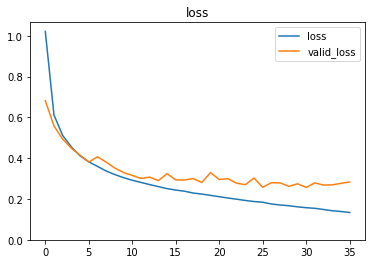

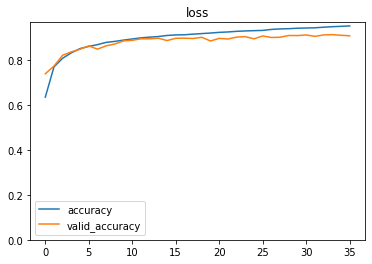

In [ ]:
plt.plot(conv_history.history["loss"], label="loss")
plt.plot(conv_history.history["val_loss"], label="valid_loss")
plt.legend()
plt.ylim(bottom=0)
plt.title("loss")
plt.show()

plt.plot(conv_history.history["accuracy"], label="accuracy")
plt.plot(conv_history.history["val_accuracy"], label="valid_accuracy")
plt.legend()
plt.ylim(bottom=0)
plt.title("loss")
plt.show()

answer =/≠ predict


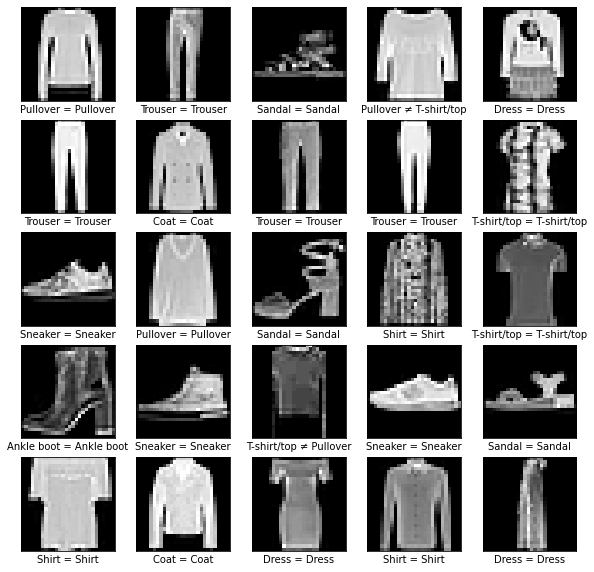

In [ ]:
print("answer =/≠ predict")
plt.figure(figsize=(10,10))
for idx in range(25):
  test_image_idx = np.random.randint(len(test_labels))
  plt.subplot(5,5,idx+1)
  _test = test_images[test_image_idx][np.newaxis]
  _pred = tf.argmax(conv_model(_test), axis=1)
  plt.imshow(_test[0])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  answer = label_map[test_labels[test_image_idx][0]]
  predict = label_map[int(_pred.numpy()[0])]
  
  plt.xlabel(f"{answer} {'≠='[answer==predict]} {predict}")
plt.show()

# 嘗試調整模型吧！
若沒有想法可以先嘗試下面這些喔
0. 換看看資料集
1. 不同的filters數量
2. 不同的kernel_size數量
3. 更多/更少 | Conv2D/Dense

# 還有很多技法
由於這份程式碼旨在讓大家理解體驗機器學習的程式碼，所以沒有放太深入的東西。<br>
下面皆是大家很常使用的技法，礙於時間限制就不講了。
* 資料增量 <br>
https://ai.googleblog.com/2019/04/specaugment-new-data-augmentation.html
![](https://4.bp.blogspot.com/-joiPxVcyU-c/XLo-bKDUSvI/AAAAAAAAEEg/NhqAZtH7hxILt5et82zIrSKvPq5DHFLCgCEwYBhgL/s640/image6.png)
https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/<br>
![](https://nanonets.com/blog/content/images/2018/11/1_C8hNiOqur4OJyEZmC7OnzQ.png)

* 不同優化器<br>
https://github.com/Jaewan-Yun/optimizer-visualization<br>
![](https://camo.githubusercontent.com/0583f9e57034d3842b05e6e5e5a96531b33d57fe430ff79545b76648f11dc6ad/68747470733a2f2f692e737461636b2e696d6775722e636f6d2f71417832692e676966)

* 遷移學習<br>
https://www.researchgate.net/publication/341874957_Diabetic_retinopathy_identification_system_based_on_transfer_learning<br>
![](https://www.researchgate.net/publication/341874957/figure/fig1/AS:899987324018688@1591585107112/Schematic-diagram-of-transfer-learning.png)

# 希望你至少記得
* 大道至簡 : Deep Learning 其實跟 Linear Regression 差不多，都是要找最好的參數
* 演化至繁 : Deep Learning 的後續應用有很多厲害的技法、能夠直接用的東西